Graphische Darstellung des Signals. Bestimmung der Grundperiode anhand des
 Plots die Grundperiode (in ms) und die Grundfrequenz (in Hz) des Signals. Wie
 groß sind Signaldauer (in s), Abtastfrequenz (in Hz), Signallänge M (Anzahl der
 Abtastzeitpunkte) und Abtastintervall ∆t (in s)?

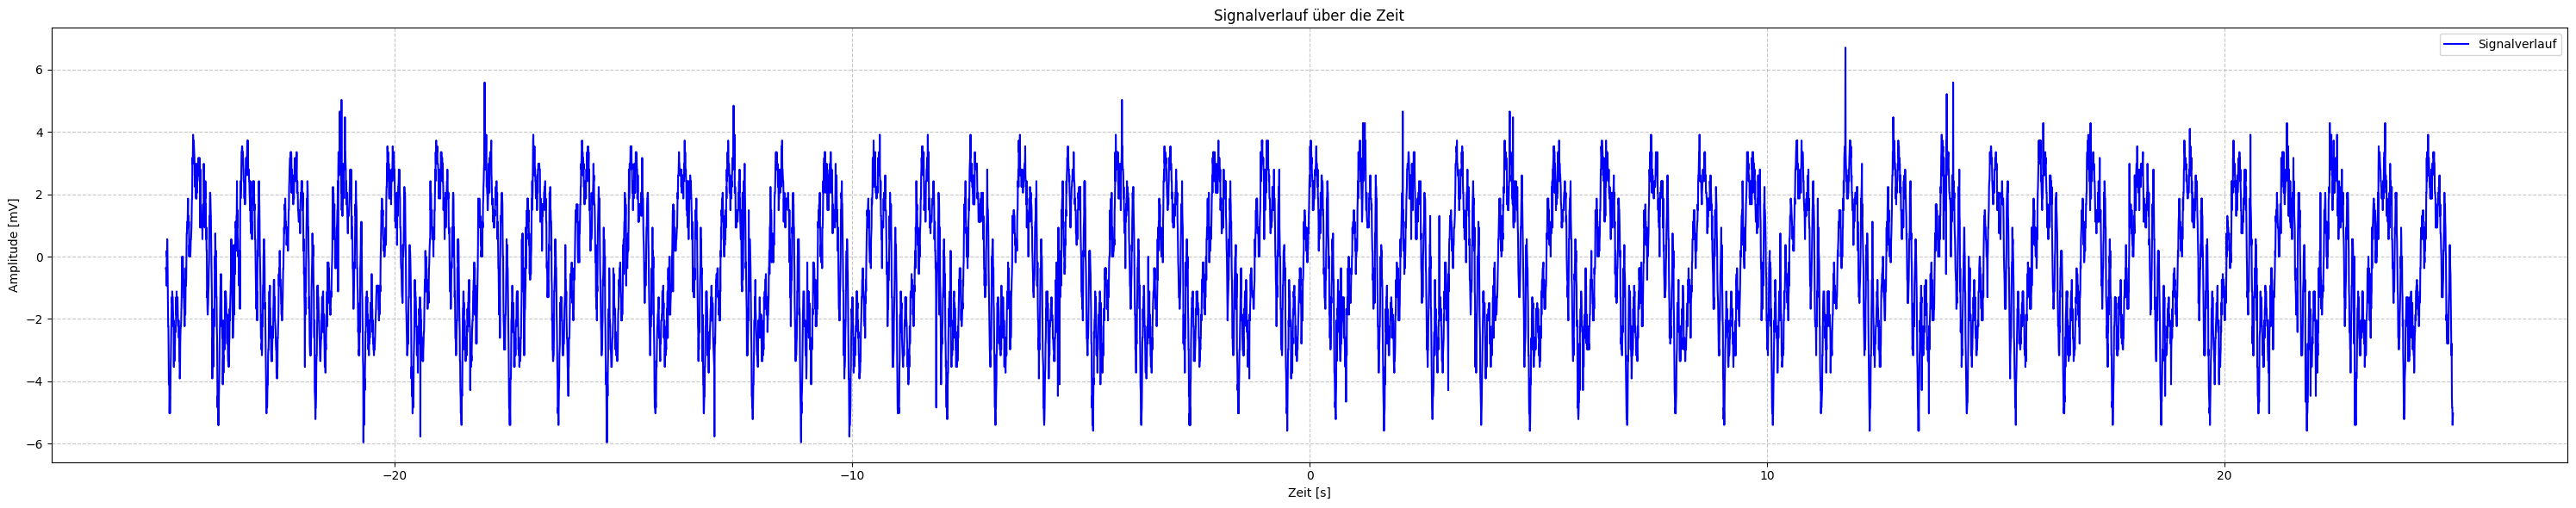

Grundperiode: 1.0640425261702127 ms
Grundfrequenz: 939.8120614589346 Hz
Signaldauer: 50.00999873 ms
Abtastfrequenz: 200.020001080292 Hz
Signallänge M: 10003
Abtastintervall ∆t: 0.004999500022993102 ms


In [46]:
import os
import numpy as np

# get current working directory
path = os.getenv('DATA_PATH')
if not path:
    raise ValueError("DATA_PATH environment variable is not set")

# Replace the German decimal comma with a dot and remove separators
converters = {i: lambda s: float(s.decode().replace(',', '.')) for i in range(2)}

# Read in csv file
csv_data = np.genfromtxt(f"{path}\\Versuch3_Messungen\\Versuch_3_Ton1.csv", delimiter=";", skip_header=3, skip_footer=1, dtype=float, converters=converters)

# Show signal
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(csv_data[:,0], csv_data[:,1], label="Signalverlauf", color='blue')
plt.xlabel("Zeit [s]")
plt.ylabel("Amplitude [mV]")
plt.title("Signalverlauf über die Zeit")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

number_of_periods = 47
signal_duration = csv_data[-1, 0] - csv_data[0, 0]
signal_period = signal_duration/number_of_periods
signal_frequency = 1000/signal_period # 1000 ms to one s
print(f"Grundperiode: {signal_period} ms")
print(f"Grundfrequenz: {signal_frequency} Hz")
print(f"Signaldauer: {signal_duration} ms")
samples = len(csv_data)
sampling_period = signal_duration / samples
sampling_frequency = 1 / sampling_period
print(f"Abtastfrequenz: {sampling_frequency} Hz")
print(f"Signallänge M: {samples}")
print(f"Abtastintervall ∆t: {sampling_period} ms")

Fouriertransformierte des Signals berechnen.
Bestimmung und Darstellung des Amplitudenspektrums.
Achtung: die Frequenzachse des numerisch berechneten Spektrums ist
nicht in der Einheit Hertz angegeben, sondern in der Einheit Anzahl Schwingungen
innerhalb der gesamten Signaldauer, d.h. der n-te Eintrag im Spektrum f[n] entspricht
n Schwingungen innerhalb der Gesamtlänge des Signals von M · ∆t s. Die zugehörige
Frequenz f in Hertz berechnet sich folglich aus
f = n/(M·∆t).
Darstellung des Amplitudenspektrums in Hertz mithilfe dieser Umrechnung.

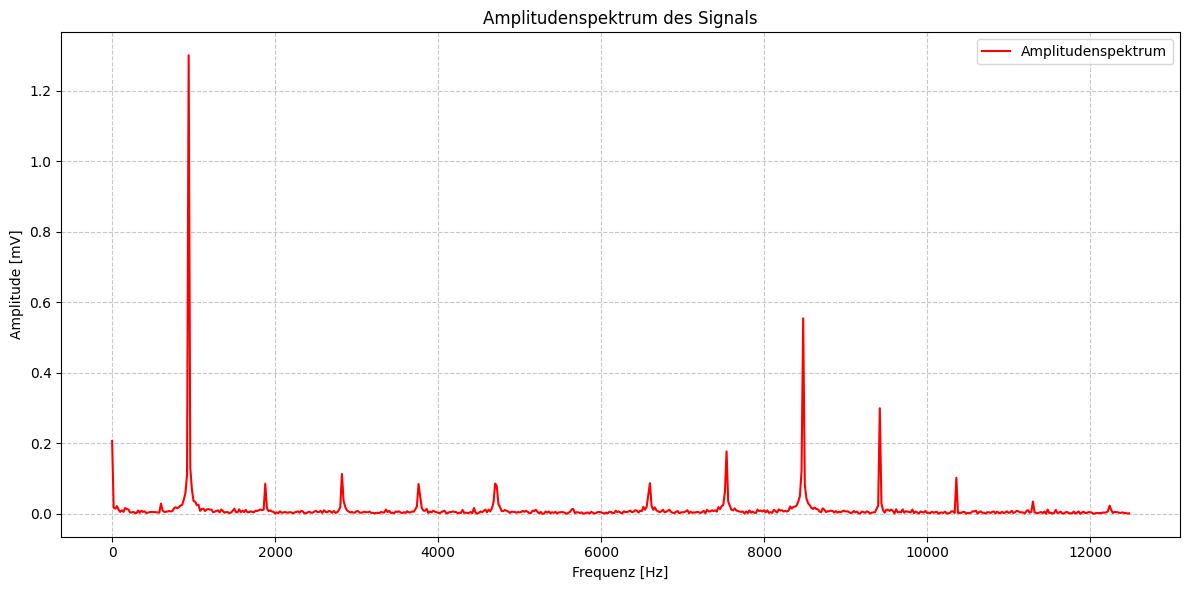

In [47]:
time_values = csv_data[:,0]
amplitude_values = csv_data[:,1]

M = samples
delta_t = sampling_period / 1000 # in s

# Calculate the Fourier transform
fft_result = np.fft.fft(amplitude_values)
amplitude_spectrum = np.abs(fft_result) / M

# Calculate the frequency axis in Hz
frequencies = np.array(range(M))
for n in range(M):
    frequencies[n] = n / (M * delta_t)
    

# Keep positive frequencies only by slicing the arrays in half
positive_freqs = frequencies[:M // 2]
positive_amplitudes = amplitude_spectrum[:M // 2]

lower_freqs = frequencies[:M // 16]
lower_freq_amplitudes = amplitude_spectrum[:M // 16]

# Plot the amplitude spectrum
plt.figure(figsize=(12, 6))
#plt.plot(positive_freqs, positive_amplitudes, label="Amplitudenspektrum", color='red')
#plt.plot(frequencies, amplitude_spectrum, label="Amplitudenspektrum", color='red')
#plt.plot( amplitude_spectrum, label="Amplitudenspektrum", color='red')
plt.plot(lower_freqs, lower_freq_amplitudes, label="Amplitudenspektrum", color='red')
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Amplitude [mV]")
plt.title("Amplitudenspektrum des Signals")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

Grundfrequenz im Spektrum identifizieren und aus der gefundenen
Wellenzahl die Frequenz in Hz berechnen. Welche Amplitude hat diese Fourierkomponente?

TODO
Amplitude mit Abstand zur x-Achse muss eventuell die doppelte sein, wenn man die gesamte Auslenkung als Amplitude möchte. 
Im unteren Schaubild werden die negativen Frequenzen weggelassen.

In [48]:
max_amplitude = max(amplitude_spectrum)
wave_number = np.argmax(amplitude_spectrum)
frequency = wave_number / (M * delta_t)

print(f"Die Grundfrequenz beträgt {frequency} Hz und hat eine Amplitude von {max_amplitude} mV.")

Die Grundfrequenz beträgt 939.8120614589346 Hz und hat eine Amplitude von 1.3009478762532964 mV.
